#**Telco Customer Churn**

#Business Understanding

How many customers left in the last month? What is the percentage?

What are the 3 services that are most signed up by customers?

Is there a relationship between the length of time a customer has stayed with the company and the monthly charges?

#Data Understanding

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3 (IBM Sample Data Sets).

Source Data: Online retail dataset by Kaggle. https://www.kaggle.com/blastchar/telco-customer-churn

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

Data Dictionary:
*   `customerID` : A unique ID that identifies each customer
*   `gender` : Whether the customer is a male or a female
*   `SeniorCitizen` : Whether the customer is a senior citizen or not (1,0)
*   `Partner` : Whether the customer has a partner or not (Yes, No)
*   `Dependents` : Whether the customer has dependents or not (Yes, No)
*   `tenure` : Number of months the customer has stayed with the company
*   `PhoneService` : Whether the customer has a phone service or not (Yes, No)
*   `MultipleLines` : Whether the customer has multiple lines or not (Yes, No, No phone service)
*   `InternetService` : Customer's internet service provider (DSL, Fiber optic, No)
*   `OnlineSecurity` : Whether the customer has online security or not (Yes, No, No internet service)
*   `OnlineBackup` : Indicates if the customer subscribes to an additional online backup service provided by the company (Yes, No, No internet service)
*   `DeviceProtection` : Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company (Yes, No, No internet service)
*   `TechSupport` : Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times (Yes, No, No internet service)
*   `StreamingTV` : Indicates if the customer uses their Internet service to stream television programing from a third party provider (Yes, No, No internet service)
*   `StreamingMovies` : Indicates if the customer uses their Internet service to stream movies from a third party provider (Yes, No, No internet service)
*   `Contract` : Indicates the customer’s current contract type (Month-to-Month, One Year, Two Year)
*   `PaperlessBilling` : Indicates if the customer has chosen paperless billing (Yes, No)
*   `PaymentMethod` : Indicates how the customer pays their bill (Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check)
*   `MonthlyCharges` : Indicates the customer’s current total monthly charge for all their services from the company
*   `TotalCharges` : Indicates the customer’s total charges, calculated to the end of the quarter specified above
*   `Churn` : Indicates the customer left the company this quarter or not (Yes, No)

#Data Preparation

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import Dataset
df = pd.read_csv('/content/drive/MyDrive/Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# Display the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Get the dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the dataframe's info, we can see:
*   The dataset has 21 columns and 7043 rows.
*   The dataset has no missing values.
*   The `TotalCharges` column is categorical data. We will change the column to numerical data type because the column is a number in string, and for easy evaluation it must be changed to numerical data type.

#Data Cleansing

In [26]:
# Change TotalCharges column to numerical data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [27]:
# Check missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are 11 missing values, all of them for the `TotalCharges` column.

There are various ways of dealing with missing values:
*   Drop records with missing values
*   Fill in missing values with zero values, mean, median, etc.

In [28]:
# Remove the rows in the dataframe whose column has missing values.
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


The dataset now has 21 columns and 7032 rows.

In [29]:
# Check duplicate rows
df.duplicated().sum()

0

There are no duplicates found.

In [30]:
# Change SeniorCitizen column to categorical data
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x==0 else 'No')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,Yes,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,Yes,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,Yes,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,Yes,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
# Separate categorical and numerical columns
category = ['gender', 'SeniorCitizen', 'Partner',	'Dependents',	'PhoneService',	'MultipleLines', 'InternetService',	'OnlineSecurity', 'OnlineBackup',	
            'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract',	'PaperlessBilling',	'PaymentMethod',	'Churn']
numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [32]:
# Numerical statistical summary
df[numeric].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Observation:
*   The minimim and maximum values make sense for each column.
*   Mean < 50% in `MonthlyCharges` column indicating negatively skewed distribution.
*   Mean > 50% in `tenure` and `TotalCharges` columns indicating positively skewed distribution.

In [33]:
# Describe method on categorical data
df[category].describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,Yes,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [34]:
# Check unique value for category columns
for column in category:
  print(f"unique value of {column} column")
  print(df[column].unique(),'\n')

unique value of gender column
['Female' 'Male'] 

unique value of SeniorCitizen column
['Yes' 'No'] 

unique value of Partner column
['Yes' 'No'] 

unique value of Dependents column
['No' 'Yes'] 

unique value of PhoneService column
['No' 'Yes'] 

unique value of MultipleLines column
['No phone service' 'No' 'Yes'] 

unique value of InternetService column
['DSL' 'Fiber optic' 'No'] 

unique value of OnlineSecurity column
['No' 'Yes' 'No internet service'] 

unique value of OnlineBackup column
['Yes' 'No' 'No internet service'] 

unique value of DeviceProtection column
['No' 'Yes' 'No internet service'] 

unique value of TechSupport column
['No' 'Yes' 'No internet service'] 

unique value of StreamingTV column
['No' 'Yes' 'No internet service'] 

unique value of StreamingMovies column
['No' 'Yes' 'No internet service'] 

unique value of Contract column
['Month-to-month' 'One year' 'Two year'] 

unique value of PaperlessBilling column
['Yes' 'No'] 

unique value of PaymentMethod column
[

Observation:
*  ` gender`, `SeniorCitizen`,	`Partner`,	`Dependents`,	`PhoneService`, `PaperlessBilling`,	and `Churn` columns have two unique values.
*   `MultipleLines`,	`InternetService`,	`OnlineSecurity`,	`OnlineBackup`,	`DeviceProtection`,	`TechSupport`,	`StreamingTV`,	`StreamingMovies`, and	`Contract` columns have three unique values.
*   `PaymentMethod` column has four unique values.

#Exploratory Data Analysis

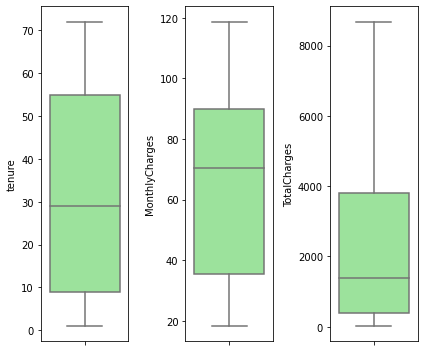

In [35]:
# Check Outlier
plt.figure(figsize=(6,5))

for i in range(0, len(numeric)):
  plt.subplot(1, len(numeric), i+1)
  sns.boxplot(y=df[numeric[i]], color='lightgreen')
  plt.tight_layout()

*  No outlier in numerical columns.
*  `TotalCharges` column is positively skewed.

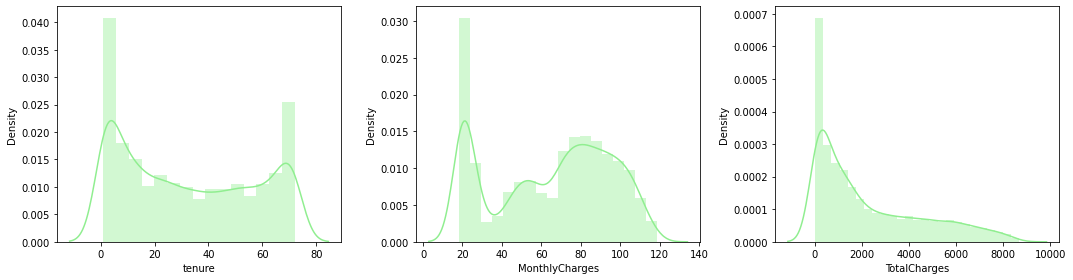

In [36]:
# Columns Distribution
plt.figure(figsize=(15,4))

for i in range(0, len(numeric)):
  plt.subplot(1, len(numeric), i+1)
  sns.distplot(x=df[numeric[i]], color='lightgreen')
  plt.xlabel(numeric[i])
  plt.tight_layout()

Observation:
*  `TotalCharges` column is positively skewed.
*  `tenure` column is bimodal distribution because it has two peaks.
*  `MonthlyCharges` is multimodal distribution because it has more than two peaks.

##What are the 3 services that are most signed up by customers?

In [73]:
service = ['PhoneService',	'MultipleLines', 'InternetService',	'OnlineSecurity', 'OnlineBackup',	
            'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies']

In [74]:
df[df[service]=='Yes'].count().sort_values(ascending=False).head(3)

PhoneService       6352
MultipleLines      2967
StreamingMovies    2731
dtype: int64

##How many customers left in the last month? What is the percentage?

Text(0, 0.5, 'Total User')

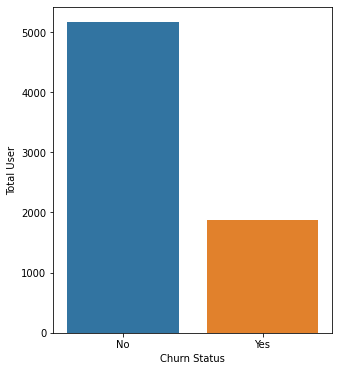

In [75]:
fig, ax = plt.subplots(figsize=(5,6))
sns.countplot(x='Churn', data=df)
plt.xlabel('Churn Status')
plt.ylabel('Total User')

In [76]:
churn_percentage = df['Churn'].value_counts(normalize=True)
churn_percentage = churn_percentage.mul(100).rename('Percentage').reset_index().rename(columns={'index':'Churn'})
churn_percentage

,Churn,Percentage
0,No,73.421502
1,Yes,26.578498


##Is there a relationship between the length of time a customer has stayed with the company and the monthly charges?

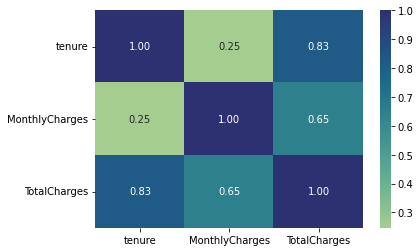

In [77]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='crest')

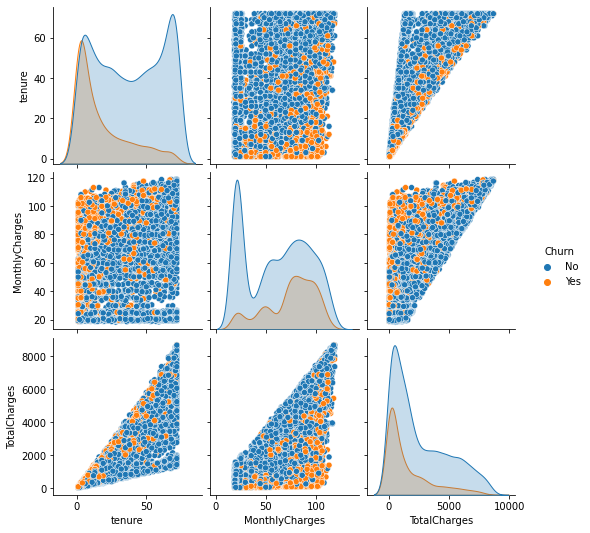

In [81]:
sns.pairplot(df, hue='Churn')